<a href="https://colab.research.google.com/github/GerlianeChaves/IsolationForest/blob/main/PRODSe_redes_UCIrvineOficial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DADOS DO UC IRVINE**

In [1]:
!pip install pandas numpy matplotlib scikit-learn

In [2]:
#usar dataset que está no google drive
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# ler o arquivo
file_path = '/content/drive/My Drive/household_power_consumption.txt'

Mounted at /content/drive


<ipython-input-3-5a0a06698e21>:10: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv(file_path, sep=";", parse_dates={"datetime": ["Date", "Time"]},
<ipython-input-3-5a0a06698e21>:10: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv(file_path, sep=";", parse_dates={"datetime": ["Date", "Time"]},
<ipython-input-3-5a0a06698e21>:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv(file_path, sep=";", parse_dates={"datetime": ["Date", "Time"]},
<ipython-input-3-5a0a06698e21>:16: Setting

                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

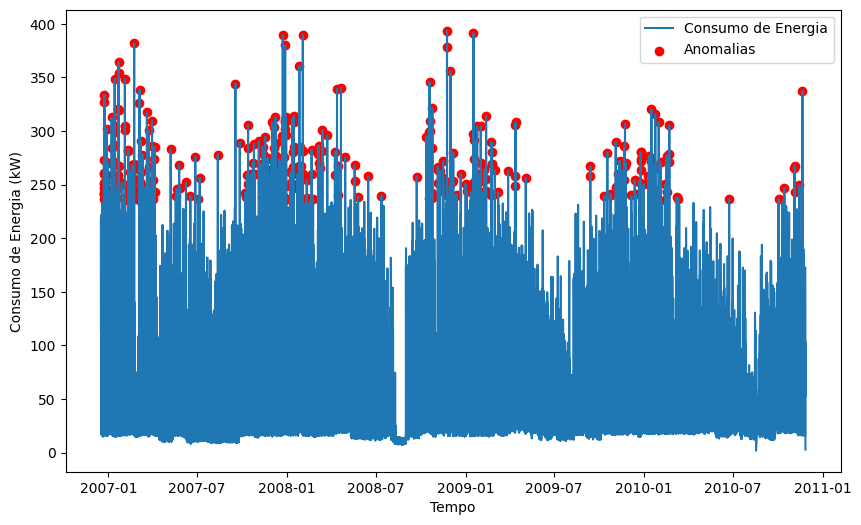

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Caminho para o arquivo (ajustar caso necessário)
#file_path = "/content/household_power_consumption.txt"

# Carregar o dataset
data = pd.read_csv(file_path, sep=";", parse_dates={"datetime": ["Date", "Time"]},
                   infer_datetime_format=True, low_memory=False, na_values=['?'],
                   index_col="datetime")

# Limpeza inicial
data = data.dropna()  # Remove valores ausentes
data['Global_active_power'] = data['Global_active_power'].astype(float)  # Converte para float
print(data.head())

# Agregar por hora
data['hourly_active_power'] = data['Global_active_power'].resample('H').sum()
data = data.dropna()

# Detecção de anomalias com Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)
data['anomaly'] = model.fit_predict(data[['hourly_active_power']])

# Visualizar os resultados
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['hourly_active_power'], label='Consumo de Energia')
plt.scatter(data[data['anomaly'] == -1].index,
            data[data['anomaly'] == -1]['hourly_active_power'],
            color='red', label='Anomalias')
plt.xlabel("Tempo")
plt.ylabel("Consumo de Energia (kW)")
plt.legend()
plt.show()


**DADOS DO E-REDES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [ ]:
#usar dataset que está no google drive
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# ler o arquivo
caminho_arquivo = '/content/drive/My Drive/consumos_horario_codigo_postal.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#converte em dataframe
df = pd.read_csv(caminho_arquivo, delimiter=';', header=0, index_col=False)
print(df.head(10))

#seleciona os dados de um só cep
cep = '2025'
df_filtrado = df[df['Código Postal'] == cep]
print(df_filtrado.head(10))

                   Data/Hora        Data   Hora Código Postal  \
0  2023-03-19T00:00:00+00:00  2023-03-19  00:00          2025   
1  2023-09-23T12:00:00+01:00  2023-09-23  12:00          4405   
2  2023-02-15T05:00:00+00:00  2023-02-15  05:00          1600   
3  2023-02-05T11:00:00+00:00  2023-02-05  11:00          3030   
4  2023-02-13T09:00:00+00:00  2023-02-13  09:00          4720   
5  2023-02-15T09:00:00+00:00  2023-02-15  09:00          6320   
6  2023-02-10T07:00:00+00:00  2023-02-10  07:00          7320   
7  2023-02-03T11:00:00+00:00  2023-02-03  11:00          7430   
8  2023-06-07T10:00:00+01:00  2023-06-07  10:00          2755   
9  2023-06-21T09:00:00+01:00  2023-06-21  09:00          2835   

   Energia ativa (kWh) Dia da Semana  
0          4596.739709       Domingo  
1         14711.438243        Sábado  
2         21440.512557        Quarta  
3         16974.037997       Domingo  
4          7247.291623       Segunda  
5          4053.501001        Quarta  
6          

In [ ]:
# Certifique-se de converter a coluna 'Data/Hora' para datetime
df_filtrado.loc[:, 'Data/Hora'] = pd.to_datetime(df_filtrado['Data/Hora'], utc=True)
#df_filtrado['Data/Hora'] = pd.to_datetime(df_filtrado['Data/Hora'], utc=True)
#df_filtrado['Data/Hora'] = pd.to_datetime(df_filtrado['Data/Hora'])
print(df_filtrado.head(10))

                      Data/Hora        Data   Hora Código Postal  \
0     2023-03-19 00:00:00+00:00  2023-03-19  00:00          2025   
22    2023-04-13 02:00:00+00:00  2023-04-13  03:00          2025   
1338  2023-03-10 05:00:00+00:00  2023-03-10  05:00          2025   
1775  2022-12-02 20:00:00+00:00  2022-12-02  20:00          2025   
3014  2022-12-25 18:00:00+00:00  2022-12-25  18:00          2025   
3564  2023-08-04 23:00:00+00:00  2023-08-05  00:00          2025   
3850  2023-08-14 21:00:00+00:00  2023-08-14  22:00          2025   
4974  2023-01-04 09:00:00+00:00  2023-01-04  09:00          2025   
5141  2022-12-10 12:00:00+00:00  2022-12-10  12:00          2025   
5158  2023-02-03 15:00:00+00:00  2023-02-03  15:00          2025   

      Energia ativa (kWh) Dia da Semana  
0             4596.739709       Domingo  
22            5601.609160        Quinta  
1338          5132.779405         Sexta  
1775          8381.274838         Sexta  
3014          6523.042904       Domingo  

In [ ]:
# Ordenar os dados de forma cronológica
df_filtrado_ordenado = df_filtrado.sort_values(by='Data/Hora')
print(df_filtrado_ordenado.head(10))

                         Data/Hora        Data   Hora Código Postal  \
2153480  2022-11-01 00:00:00+00:00  2022-11-01  00:00          2025   
2978091  2022-11-01 01:00:00+00:00  2022-11-01  01:00          2025   
848068   2022-11-01 02:00:00+00:00  2022-11-01  02:00          2025   
3590892  2022-11-01 03:00:00+00:00  2022-11-01  03:00          2025   
2712957  2022-11-01 04:00:00+00:00  2022-11-01  04:00          2025   
3271458  2022-11-01 05:00:00+00:00  2022-11-01  05:00          2025   
3288000  2022-11-01 06:00:00+00:00  2022-11-01  06:00          2025   
2370407  2022-11-01 07:00:00+00:00  2022-11-01  07:00          2025   
3643443  2022-11-01 08:00:00+00:00  2022-11-01  08:00          2025   
452275   2022-11-01 09:00:00+00:00  2022-11-01  09:00          2025   

         Energia ativa (kWh) Dia da Semana  
2153480          5969.117272         Terça  
2978091          5052.778468         Terça  
848068           4774.370621         Terça  
3590892          4660.787533         T

In [ ]:
#seta data/hora como index do dataframe
df_filtrado_ordenado = df_filtrado_ordenado.set_index('Data/Hora')
print(df_filtrado_ordenado.head(10))


                                 Data   Hora Código Postal  \
Data/Hora                                                    
2022-11-01 00:00:00+00:00  2022-11-01  00:00          2025   
2022-11-01 01:00:00+00:00  2022-11-01  01:00          2025   
2022-11-01 02:00:00+00:00  2022-11-01  02:00          2025   
2022-11-01 03:00:00+00:00  2022-11-01  03:00          2025   
2022-11-01 04:00:00+00:00  2022-11-01  04:00          2025   
2022-11-01 05:00:00+00:00  2022-11-01  05:00          2025   
2022-11-01 06:00:00+00:00  2022-11-01  06:00          2025   
2022-11-01 07:00:00+00:00  2022-11-01  07:00          2025   
2022-11-01 08:00:00+00:00  2022-11-01  08:00          2025   
2022-11-01 09:00:00+00:00  2022-11-01  09:00          2025   

                           Energia ativa (kWh) Dia da Semana  
Data/Hora                                                     
2022-11-01 00:00:00+00:00          5969.117272         Terça  
2022-11-01 01:00:00+00:00          5052.778468         Terça  
202

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [ ]:
# Agregar os dados por hora
df_filtrado_ordenado['consumo_por_hora'] = (
    df_filtrado_ordenado['Energia ativa (kWh)']
    .resample('h')  # Agregar por hora
    .sum()
)
print(df_filtrado_ordenado.head(10))

                                 Data   Hora Código Postal  \
Data/Hora                                                    
2022-11-01 00:00:00+00:00  2022-11-01  00:00          2025   
2022-11-01 01:00:00+00:00  2022-11-01  01:00          2025   
2022-11-01 02:00:00+00:00  2022-11-01  02:00          2025   
2022-11-01 03:00:00+00:00  2022-11-01  03:00          2025   
2022-11-01 04:00:00+00:00  2022-11-01  04:00          2025   
2022-11-01 05:00:00+00:00  2022-11-01  05:00          2025   
2022-11-01 06:00:00+00:00  2022-11-01  06:00          2025   
2022-11-01 07:00:00+00:00  2022-11-01  07:00          2025   
2022-11-01 08:00:00+00:00  2022-11-01  08:00          2025   
2022-11-01 09:00:00+00:00  2022-11-01  09:00          2025   

                           Energia ativa (kWh) Dia da Semana  consumo_por_hora  
Data/Hora                                                                       
2022-11-01 00:00:00+00:00          5969.117272         Terça       5969.117272  
2022-11-01 0

In [ ]:
#remover linhas com dados ausentes
df_filtrado_ordenado = df_filtrado_ordenado.dropna()

In [ ]:
# Detecção de anomalias com Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)
df_filtrado_ordenado['anomaly'] = model.fit_predict(df_filtrado_ordenado[['consumo_por_hora']])


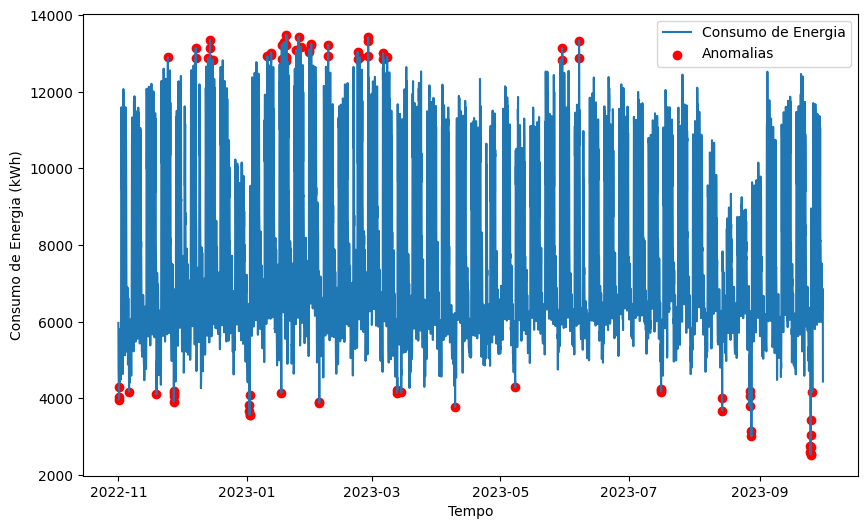

In [ ]:
# Visualizar os resultados
plt.figure(figsize=(10, 6))
plt.plot(df_filtrado_ordenado.index, df_filtrado_ordenado['consumo_por_hora'], label='Consumo de Energia')
plt.scatter(df_filtrado_ordenado[df_filtrado_ordenado['anomaly'] == -1].index,
            df_filtrado_ordenado[df_filtrado_ordenado['anomaly'] == -1]['consumo_por_hora'],
            color='red', label='Anomalias')
plt.xlabel("Tempo")
plt.ylabel("Consumo de Energia (kWh)")
plt.legend()
plt.show()

In [ ]:
#visualizar com a coluna de anomalias
print(df_filtrado_ordenado.head(10))

                                 Data   Hora Código Postal  \
Data/Hora                                                    
2022-11-01 00:00:00+00:00  2022-11-01  00:00          2025   
2022-11-01 01:00:00+00:00  2022-11-01  01:00          2025   
2022-11-01 02:00:00+00:00  2022-11-01  02:00          2025   
2022-11-01 03:00:00+00:00  2022-11-01  03:00          2025   
2022-11-01 04:00:00+00:00  2022-11-01  04:00          2025   
2022-11-01 05:00:00+00:00  2022-11-01  05:00          2025   
2022-11-01 06:00:00+00:00  2022-11-01  06:00          2025   
2022-11-01 07:00:00+00:00  2022-11-01  07:00          2025   
2022-11-01 08:00:00+00:00  2022-11-01  08:00          2025   
2022-11-01 09:00:00+00:00  2022-11-01  09:00          2025   

                           Energia ativa (kWh) Dia da Semana  \
Data/Hora                                                      
2022-11-01 00:00:00+00:00          5969.117272         Terça   
2022-11-01 01:00:00+00:00          5052.778468         Terça   

In [ ]:
#visualiza só as anomalias
anomalias = df_filtrado_ordenado[df_filtrado_ordenado['anomaly'] == -1]
print(anomalias)


                                 Data   Hora Código Postal  \
Data/Hora                                                    
2022-11-01 05:00:00+00:00  2022-11-01  05:00          2025   
2022-11-01 06:00:00+00:00  2022-11-01  06:00          2025   
2022-11-01 07:00:00+00:00  2022-11-01  07:00          2025   
2022-11-06 02:00:00+00:00  2022-11-06  02:00          2025   
2022-11-19 01:00:00+00:00  2022-11-19  01:00          2025   
...                               ...    ...           ...   
2023-09-25 02:00:00+00:00  2023-09-25  03:00          2025   
2023-09-25 03:00:00+00:00  2023-09-25  04:00          2025   
2023-09-25 04:00:00+00:00  2023-09-25  05:00          2025   
2023-09-25 05:00:00+00:00  2023-09-25  06:00          2025   
2023-09-25 22:00:00+00:00  2023-09-25  23:00          2025   

                           Energia ativa (kWh) Dia da Semana  \
Data/Hora                                                      
2022-11-01 05:00:00+00:00          4291.072570         Terça   
2